# Multi Layer Perceptron Neural Network

## Biological neuron

<img src="img/neuron.png" width="50%">

A neuron, is an electrically excitable cell that receives, processes, and transmits information through electrical and chemical signals. They made of a cell body (soma), dendrites and an axon.

- Dendrite: It receives signals from other neurons
- Soma: It sums all the incoming signals to generate input
- Axon: When the sum reaches a threshold value, sends the signal to the synapse
- Synapses: The point of interconnection of one neuron with other neurons

## Artificial neuron

<img src="img/aneuron.png" width="50%">

Simlulates the structure of a biological neron. As of the simplicity of derivative calculatoin, it uses sum of product of input and coresponding weights. It fires, if the summation reachs to a threshhold. Note that, because of good approximation of fuzzy activations, the function $f$ maybe more complex than simple threshhold function. This functions should be continous and differentiable. For example, tanh, relu and its variants, sigmoid and radial basis functions are some of them. Same as linear regression, by finding set of appropreate weights, we can solve a linear regression problem with this approach

## Artificial neural network

<img src="img/ann.png" width="70%">

An artificial neural network consist of many single neurons connected to each other with a specific structure. Multi layer perceptron (MLP) is a most basic network which neurons are stacked in several layers. Convolutional and recurrent neural networks are other types of ANNs. By training a netwrok we can find optimal weights which leads to a good approximation of desirerd dataset. This process can be devided into three major phases:

- Forward pass
- Backward pass
- Updating weights

### Forward pass

Suppose a $d$-dimensional dataset constains $n$ different samples named $X^{n\times d}$ and $k$-dimensional target values $Y^{n\times k}$. By defining a weight matrix $W_{1}^{d\times h1}$ and using matrix multiplication we have

$z_1 = X \cdot W_1$

which $z_1$ denotes first hidden layer of network. This proccess is equal to apply simple weighted summation for whole dataset and by applying a nonlinear actiovation function we have

$a_1 = \sigma(z_1)$

It's clear that the shape of $a_1$ is $(n \times h1)$. we can repeat this procees. So we have

$z_i = a_{i-1} \cdot W_i$

$a_i = \sigma(z_i)$

for $i=2,\ldots,r$. In the last layer, we have

$\hat{y} = a_r \cdot W_r$

which $\hat{y}$ is the prediction of neural network w.r.t input data $X$ and weights $\{W_i\}_{i=1}^r$.

### loss function

To see the accuracy of the network, we need a measure function to show the cost of prediction. The most known loss functions are mean squared error (MSE) end cross entropy (Xentropy) which are used in regression and classifications tasks, respectively. There are many other loss functions such as mean absolute error, Vapnik's $\epsilon$-insensetive loss function, etc.

### Backward pass

In [ ]:
### weight update

## Finding optimal weights

<img src="img/optimizer.png" width="50%">

## Backpropagation

## Implementation

### preprocessing
we used standard scaling for all inputs. and one hot encoding for classification tasks.

In [1]:
# MLP class

## Hyperparameter tuning

In [2]:
# Grid search
# Parallel

# Datasets

In [2]:
%load_ext autoreload
%autoreload 2
from result_analyzer import *
from nn.mlp.activations import *

In [4]:
%%html
<style>
table.dataframe {
    margin: 10px auto !important;
    border: 1px solid #cfcfcf;
    width: 100%;
}
table.dataframe * {
    text-align:center !important;
}
</style>

## Iris dataset

In [5]:
hidden_layers = [(5, 5, 5, 5), (10, 10, 5), (15, 15), (20, 15, 10)]
activations = [Tanh(), LeakyReLu(.1), ReLu()]
batch_sizes = [16, 32, 64]
epochs = [1000]
mus = [0.85, 0.9, 0.95]
betas = [.1, .2]
etas = [.01, .1, 0.001]
alphas = [.001, 0.01, .1]

we ran 1944 different models in about 40 min 

,hidden_layer,activation,epoch,eta,beta,alpha,mu,batch_size,test_score,loss
0,"(5, 5, 5, 5)",ReLu,1000,0.1,0.2,0.001,0.95,16,1.000000,0.07
1,"(5, 5, 5, 5)",ReLu,1000,0.1,0.2,0.001,0.95,32,1.000000,0.12
2,"(10, 10, 5)",ReLu,1000,0.1,0.2,0.001,0.85,16,1.000000,0.14
3,"(5, 5, 5, 5)",LeakyReLu(0.1),1000,0.1,0.2,0.001,0.85,16,1.000000,0.15
4,"(10, 10, 5)",Tanh,1000,0.1,0.1,0.010,0.95,32,0.973684,0.00
5,"(20, 15, 10)",Tanh,1000,0.1,0.2,0.010,0.90,16,0.973684,0.02


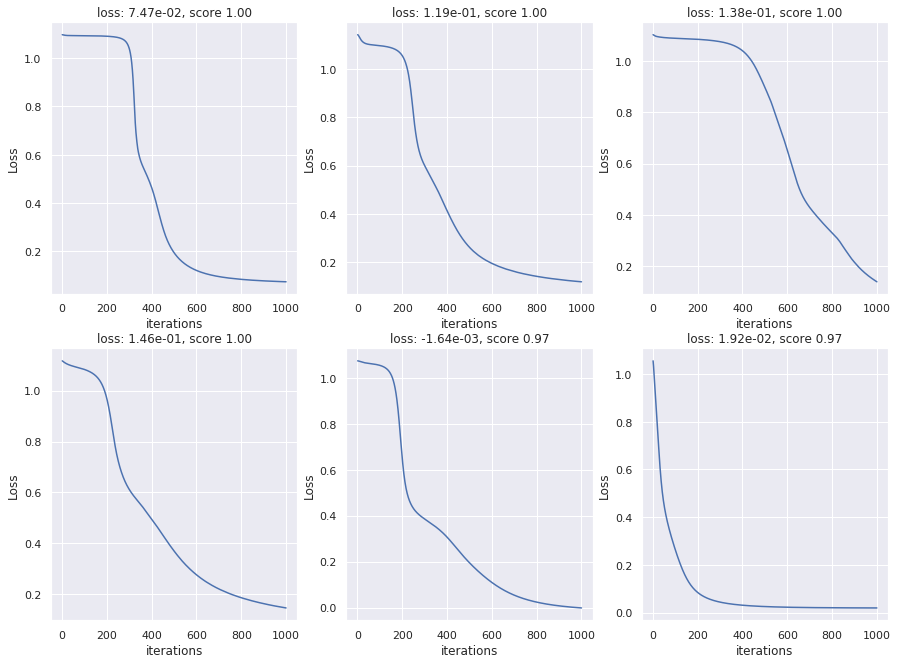

In [7]:
iris_csv_result = '../../results/iris.csv'
best_models = analyze(iris_csv_result)
best_models

## Satlog dataset

we tried 972 different models in about 6:30 min

In [4]:
hidden_layers = [(32, 16, 8), (10, 10), (12, 6)]
activations = [Tanh(), Sigmoid(), LeakyReLu(.03)]
batch_sizes = [64, 256, 512]
epochs = [1000]
mus = [0.95, .9]
betas = [.1, .3]
etas = [.01, 0.1, .3]
alphas = [.001, 0.01, 0.1]

,hidden_layer,activation,epoch,eta,beta,alpha,mu,batch_size,test_score,loss
0,"(32, 16, 8)",Tanh,1000,0.3,0.3,0.001,0.95,64,0.8770,0.29
1,"(32, 16, 8)",LeakyReLu(0.03),1000,0.3,0.3,0.001,0.95,64,0.8755,0.28
2,"(32, 16, 8)",LeakyReLu(0.03),1000,0.3,0.3,0.010,0.95,64,0.8640,0.43
3,"(32, 16, 8)",LeakyReLu(0.03),1000,0.3,0.3,0.001,0.90,64,0.8635,0.30
4,"(32, 16, 8)",LeakyReLu(0.03),1000,0.3,0.3,0.010,0.90,64,0.8605,0.57
5,"(32, 16, 8)",LeakyReLu(0.03),1000,0.3,0.1,0.001,0.95,64,0.8575,0.34


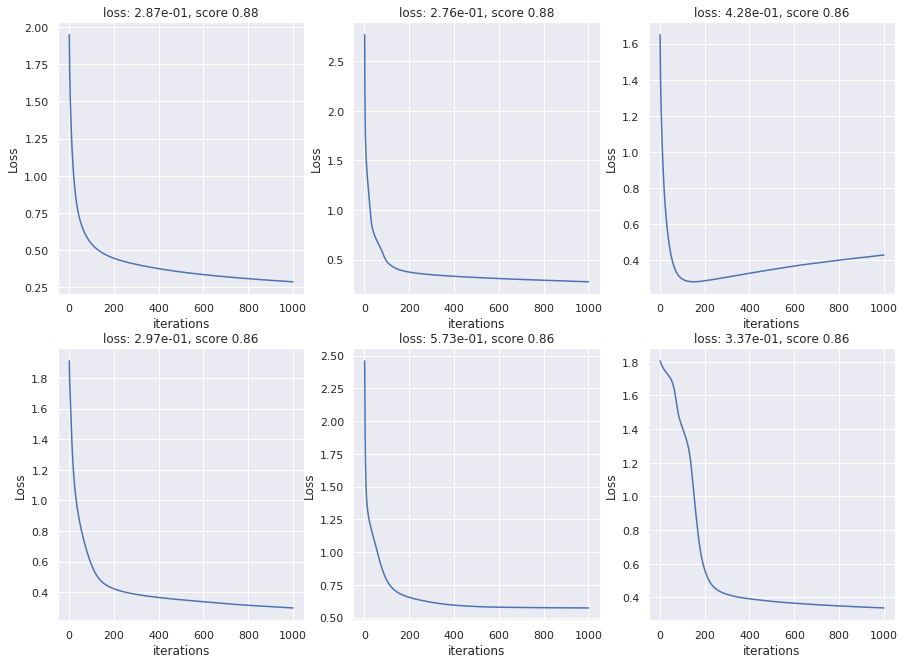

In [3]:
iris_csv_result = '../../results/satlog.csv'
best_models = analyze(iris_csv_result)
best_models

Again we used this grid to find optimal model.

In [8]:
hidden_layers = [(32, 16, 8)]
activations = [ReLu(), LeakyReLu(.03), LeakyReLu(.1)]
batch_sizes = [32, 64]
epochs = [3000]
mus = [0.95]
betas = [.3, .5]
etas = [.3,.4]
alphas = [.001,0.0001]

,hidden_layer,activation,epoch,eta,beta,alpha,mu,batch_size,test_score,loss
0,"(32, 16, 8)",ReLu,3000,0.3,0.3,0.0010,0.95,32,0.9035,0.14
1,"(32, 16, 8)",ReLu,3000,0.4,0.3,0.0010,0.95,64,0.9010,0.16
2,"(32, 16, 8)",ReLu,3000,0.3,0.3,0.0001,0.95,64,0.8995,0.16
3,"(32, 16, 8)",LeakyReLu(0.1),3000,0.4,0.5,0.0010,0.95,32,0.8985,0.12
4,"(32, 16, 8)",LeakyReLu(0.1),3000,0.3,0.3,0.0010,0.95,32,0.8985,0.14
5,"(32, 16, 8)",LeakyReLu(0.03),3000,0.3,0.3,0.0010,0.95,32,0.8975,0.14


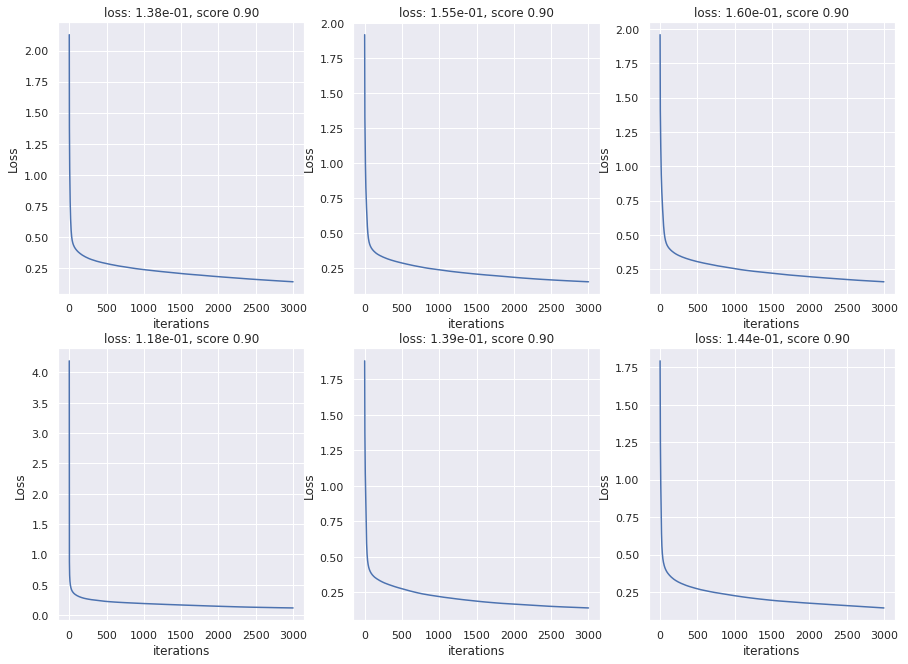

In [9]:
iris_csv_result = '../../results/satlog-1.csv'
best_models = analyze(iris_csv_result)
best_models

## MNIST dataset

## Fashion mnist dataset